In [1]:
import os
#os.environ["PATH"] = "=/usr/local/cuda-12.2/bin:$PATH"
#os.environ["LD_LIBRARY_PATH"] = "/usr/local/cuda-12.2/lib64:$LD_LIBRARY_PATH"
#os.environ["CUDA_HOME"] = "/usr/local/cuda-12.2"
os.environ["TF_USE_LEGACY_KERAS"] = "0"

import tensorflow as tf

from tensorflow.keras import layers, models, activations
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import hls4ml
from tqdm import tqdm
import seaborn as sns
import pandas as pd
tf.__version__

2024-06-20 14:55:05.345084: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 14:55:05.629976: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 14:55:05.630039: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 14:55:05.675879: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 14:55:05.769150: I tensorflow/core/platform/cpu_feature_guar

/home/rikpi/.local/lib/python3.11/site-packages/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


'2.15.1'

In [2]:
#Set sample number
sample_num = 300

dataset_dict={300:'./dataset.npy', 500:'./dataset_500.npy', 800:'./dataset_800.npy', 1000:'./dataset_1000.npy'}


# Load the data
with open (dataset_dict[sample_num],'rb') as f:
  X_train = np.load(f,allow_pickle=True)
  Y_train = np.load(f,allow_pickle=True)
  X_val = np.load(f,allow_pickle=True)
  Y_val = np.load(f,allow_pickle=True)
  X_test =np.load(f,allow_pickle=True)
  Y_test =np.load(f,allow_pickle=True)

num_classes = len(np.unique(Y_train))
y_train_onehot = tf.keras.utils.to_categorical(Y_train, num_classes=num_classes)
y_val_onehot = tf.keras.utils.to_categorical(Y_val, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(Y_test, num_classes=num_classes)

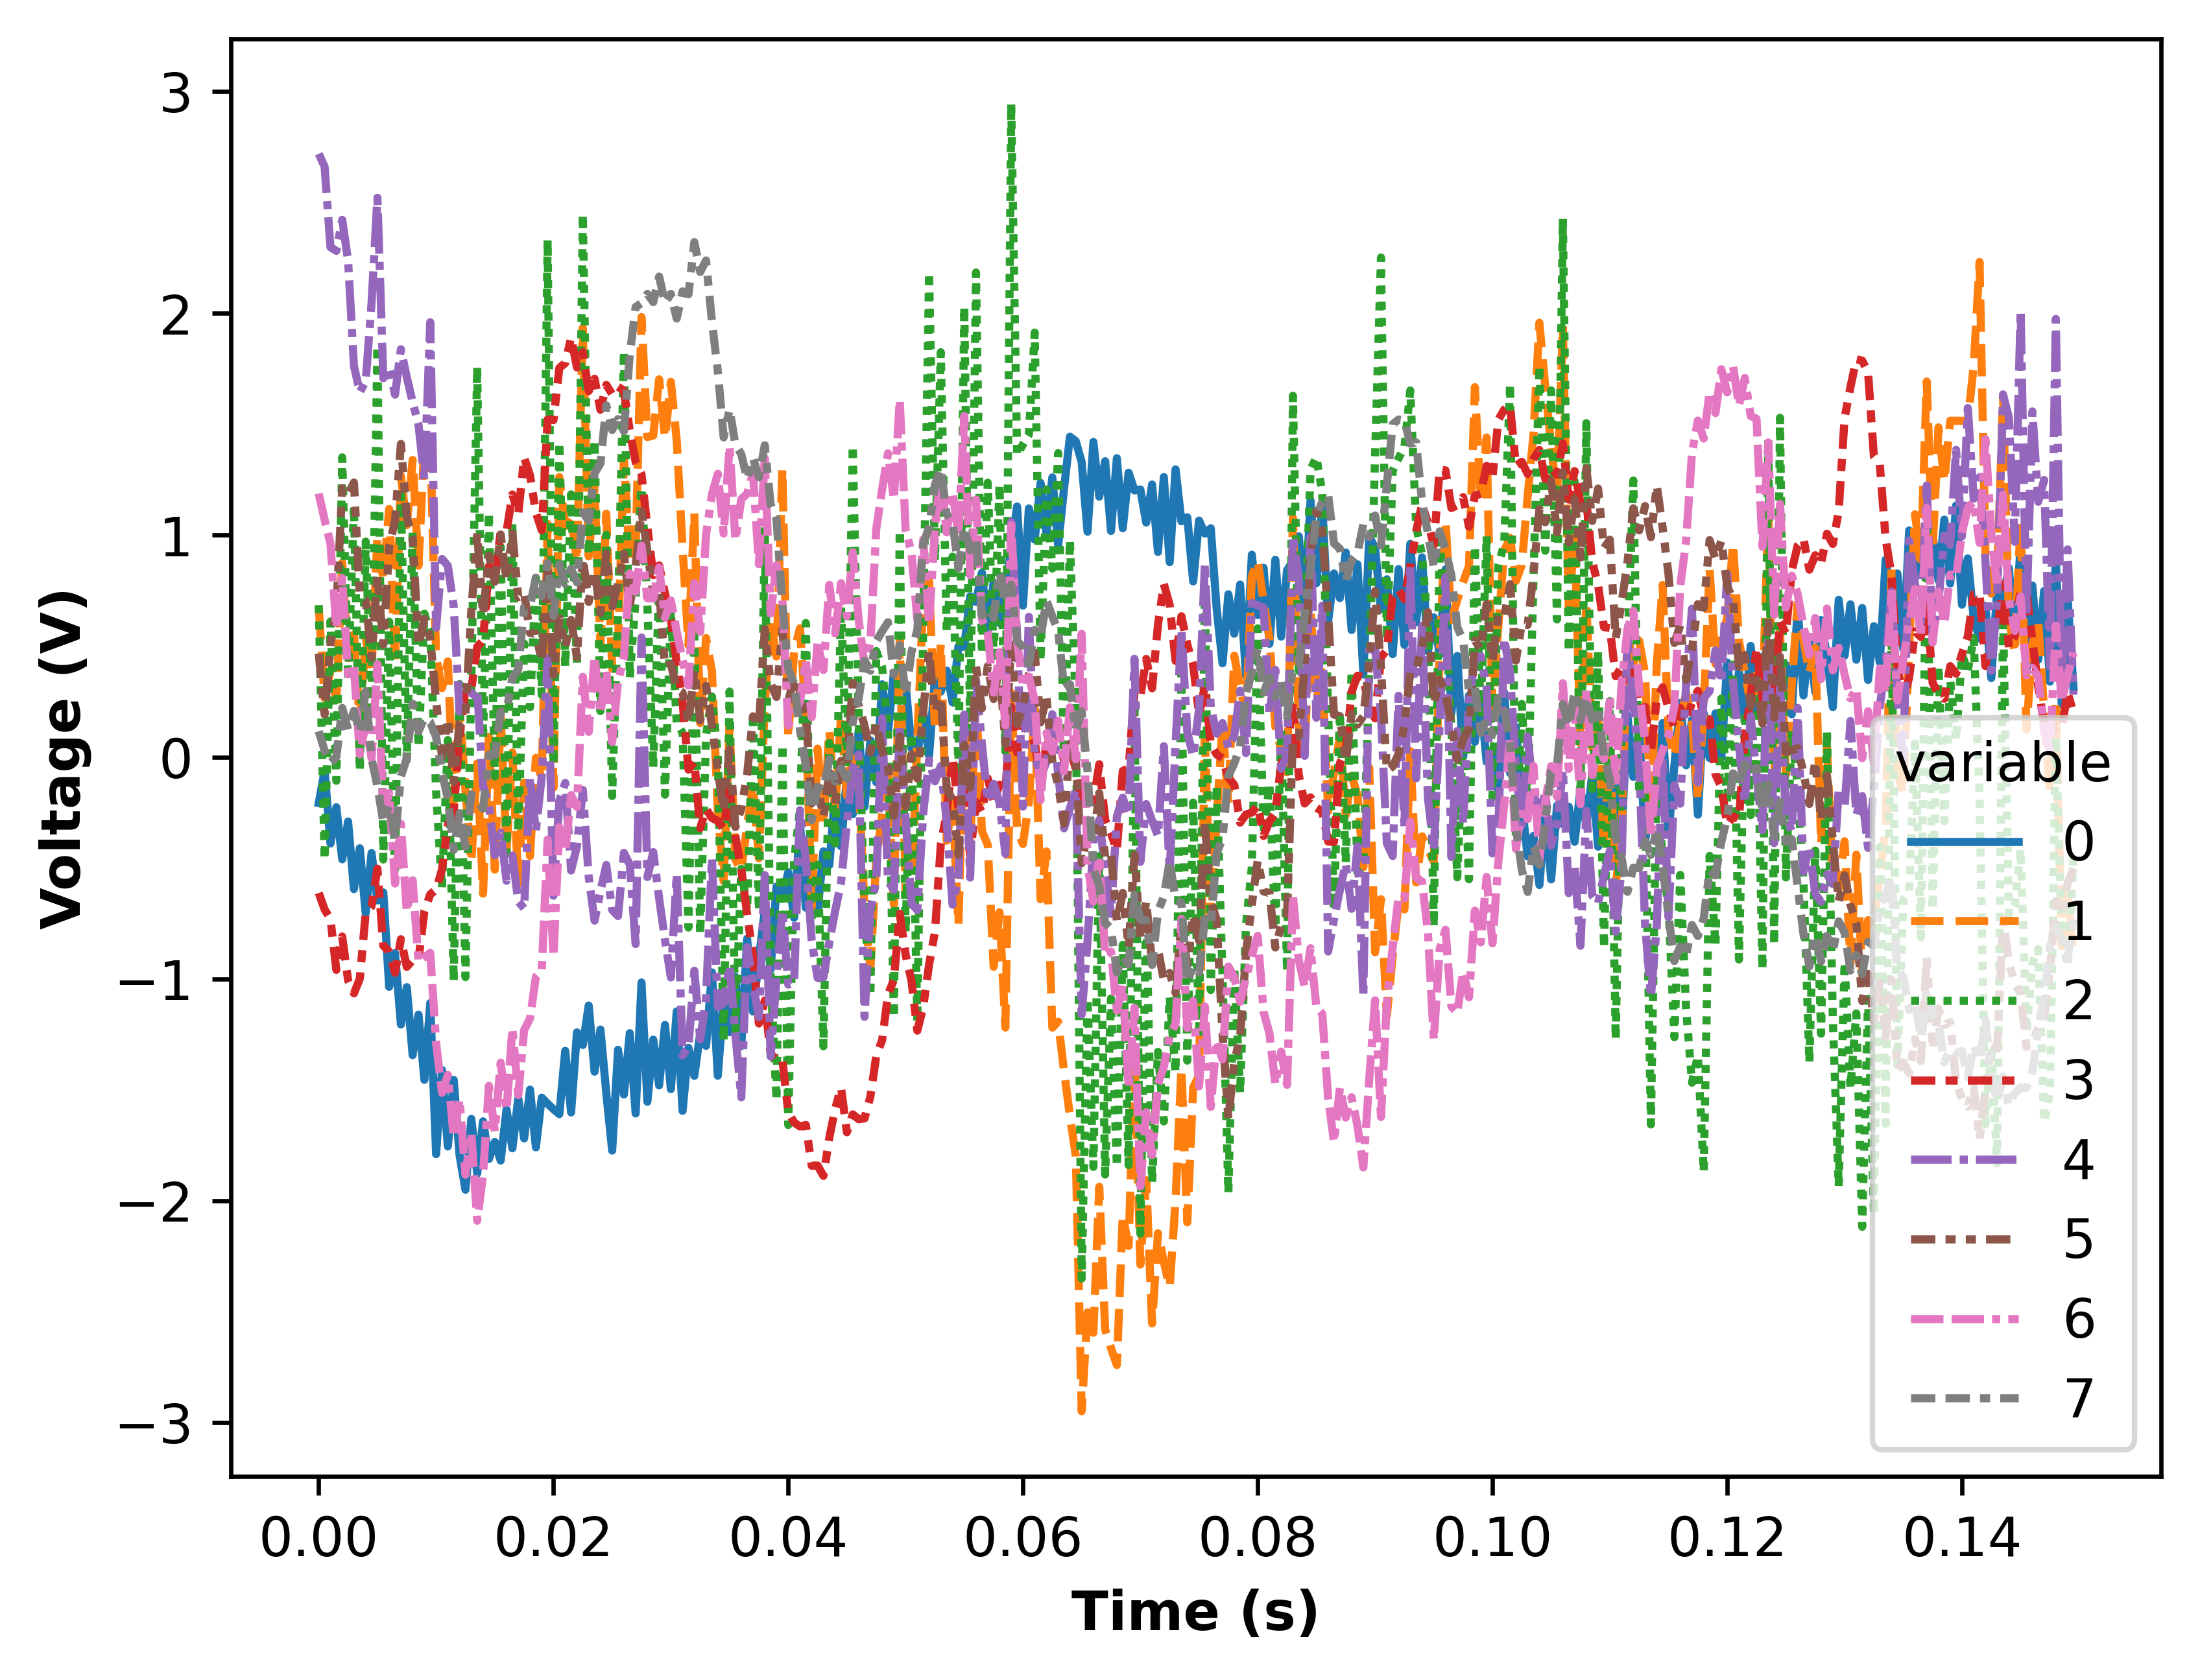

In [29]:
Fs = 2000
time_axis = np.arange(0, len(X_train[10]) / Fs, 1 / Fs)
df_xtrain = pd.DataFrame({
    'Time' : time_axis,
    '0' : X_train[0,:,0],
    '1' : X_train[0,:,1],
    '2' : X_train[0,:,2],
    '3' : X_train[0,:,3],
    '4' : X_train[0,:,4],
    '5' : X_train[0,:,5],
    '6' : X_train[0,:,6],
    '7' : X_train[0,:,7]
})
dfl = pd.melt(df_xtrain, ['Time'])
#sns.set_theme(rc={'figure.figsize':(20,10)})
sns.reset_defaults()
#plt.figure(figsize=(10,10))
plt.rcParams.update({"figure.dpi": 600})
ax = sns.lineplot(data=dfl, x='Time', y='value', hue='variable', style='variable')#TODO STYLE
ax.set_ylabel("Voltage (V)", fontdict={'weight': 'bold'})
ax.set_xlabel("Time (s)", fontdict={'weight': 'bold'})
plt.show()